In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datasets = {
    'polos': 'falabella-hombres-polos.csv',
    'camisas': 'falabella-hombres-camisas.csv',
    'jeans': 'falabella-hombres-jeans.csv',
    'pantalones_joggers' : 'falabella-hombres-pantalones_joggers.csv',
    'poleras': 'falabella-hombres-poleras.csv',
    'casacas_abrigos': 'falabella-hombres-casacas_abrigos.csv',
    'chompas_chalecos': 'falabella-hombres-chompas_chalecos.csv',
    'shorts_bermudas': 'falabella-hombres-shorts_bermudas.csv',
    'ropas_de_bano': 'falabella-hombres-ropas_de_bano.csv',
    'ropa_formal': 'falabella-hombres-ropa_formal.csv',
    'boxers_calzoncillos': 'falabella-hombres-boxers_calzoncillos.csv',
    'medias': 'falabella-hombres-medias.csv',
    'pijamas': 'falabella-hombres-pijamas.csv',
    'zapatillas_urbanas': 'falabella-hombres-pijamas.csv',
    'zapatillas_deportivas': 'falabella-hombres-zapatillas_deportivas.csv',
    'zapatos': 'falabella-hombres-zapatos.csv',
    'pantuflas': 'falabella-hombres-pantuflas.csv'
}

gender = 'Hombres'
retail = 'Falabella'

In [50]:
for category, dataset in datasets.items():
    # Import dataset
    df = pd.read_csv(datasets[category], delimiter=";")
    df.head()

    # Get rows with empty values in 'brand' column and drop it
    df[df.isnull().any(axis=1)]
    df.dropna(subset=['brand'], inplace=True)

    # Get duplicated rows by link and drop it
    duplicates = df[df.duplicated(subset='link', keep=False)]
    df.drop_duplicates(subset='link', keep=False, inplace=True)

    # Cleaning all 'brand' column
    # Scan
    df['brand'].describe()
    df['brand'].unique()

    # Clean
    df['brand'] = df['brand'].str.strip('\n')
    df['brand'] = df['brand'].str.strip(' ')

    # Title brands
    df['brand'] = df['brand'].str.title()

    # Cleaning all 'price' column
    # Scan
    df['price'].describe()
    df['price'].unique()

    # Clean
    df['price'] = df['price'].str.replace(' ', '')
    df['price'] = df['price'].str.replace('S/', '')
    df['price'] = df['price'].str.replace(',', '')
    df['price'] = df['price'].str.split('-').str[0]

    # Convert str to float
    df['price'] = df['price'].astype('float')

    # Define 'gender', 'retail', 'category' columns
    df['gender'] = gender
    df['retail'] = retail
    df['category'] = category.title()

    # Cleaning all 'category' column
    df['category'] = df['category'].str.replace('_', ' ')

    # Order columns
    df = df[['retail', 'gender', 'category', 'brand', 'description', 'price', 'link']]
    df.to_csv(f'pp-{retail.lower()}-{gender.lower()}-{category}.csv', index=False)

In [51]:
# Import all preprocessed (pp) files
import glob
all_dfs = []
for one_filename in glob.glob('pp*.csv'):
    new_df = pd.read_csv(one_filename)
    all_dfs.append(new_df)

df_all = pd.concat(all_dfs)
df_all = df_all.reset_index()
del df_all['index']
df_all

retail   gender               category              brand  \
0      Falabella  Hombres  Zapatillas Deportivas             Adidas   
1      Falabella  Hombres  Zapatillas Deportivas             Adidas   
2      Falabella  Hombres  Zapatillas Deportivas             Adidas   
3      Falabella  Hombres  Zapatillas Deportivas               Puma   
4      Falabella  Hombres  Zapatillas Deportivas               Puma   
...          ...      ...                    ...                ...   
11989  Falabella  Hombres                  Jeans              Gzuck   
11990  Falabella  Hombres                  Jeans             Norton   
11991  Falabella  Hombres                  Jeans             Norton   
11992  Falabella  Hombres                  Jeans  Polo Ralph Lauren   
11993  Falabella  Hombres                  Jeans              Gzuck   

                                             description  price  \
0             Zapatillas Running Hombre adidas Duramo...  219.0   
1      Zapatillas Running Hombre Adidas Duramo Sl 2.0...  219.0   
2             Zapatillas Running Hombre adidas Duramo...  219.0   
3         Zapatillas Running Hombre Puma Softride Cruise  159.0   
4         Zapatillas Running Hombre Puma Softride Cruise  159.0   
...                                                  ...    ...   
11989        Pantalon Denim Stretch Super Pitillo Hombre  159.0   
11990                      Pantalon Denim Stretch Hombre  151.2   
11991                      Pantalon Denim Stretch Hombre  151.2   
11992                  Pantalón Hombre Polo Ralph Lauren  499.0   
11993        Pantalon Denim Stretch Super Pitillo Hombre  159.0   

                                                    link  
0      https://www.falabella.com.pe/falabella-pe/prod...  
1      https://www.falabella.com.pe/falabella-pe/prod...  
2      https://www.falabella.com.pe/falabella-pe/prod...  
3      https://www.falabella.com.pe/falabella-pe/prod...  
4      https://www.falabella.com.pe/falabella-pe/prod...  
...                                                  ...  
11989  https://www.falabella.com.pe/falabella-pe/prod...  
11990  https://www.falabella.com.pe/falabella-pe/prod...  
11991  https://www.falabella.com.pe/falabella-pe/prod...  
11992  https://www.falabella.com.pe/falabella-pe/prod...  
11993  https://www.falabella.com.pe/falabella-pe/prod...  

[11994 rows x 7 columns]

In [52]:
# Export dataframe to csv
df_all.to_csv('df_all.csv', index=False)

In [53]:
# Sum statistics
df_all_describe = df_all.describe().round(2)
df_all_describe

price
count  11994.00
mean     140.14
std      147.51
min        4.90
25%       49.00
50%       89.97
75%      179.90
max     2659.00

In [54]:
# Group by category and brand
df_all_sort = df_all.groupby(['retail', 'gender', 'category','brand']).agg({'price': ['count', 'mean', 'std', 'min', 'max']})
df_all_sort.columns = ['count', 'price_mean', 'price_std', 'price_min', 'price_max']
df_all_sort = df_all_sort.sort_values(by=['category', 'count'], ascending=[True,False])
df_all_sort = df_all_sort.reset_index()
df_all_sort = df_all_sort.fillna(0)
df_all_sort = df_all_sort.round(2)
df_all_sort

retail   gender             category                      brand  \
0    Falabella  Hombres  Boxers Calzoncillos               Calvin Klein   
1    Falabella  Hombres  Boxers Calzoncillos                     Boston   
2    Falabella  Hombres  Boxers Calzoncillos                    Mossimo   
3    Falabella  Hombres  Boxers Calzoncillos                    Newport   
4    Falabella  Hombres  Boxers Calzoncillos                    Palmers   
..         ...      ...                  ...                        ...   
860  Falabella  Hombres              Zapatos                     Jaguar   
861  Falabella  Hombres              Zapatos               Michael Kors   
862  Falabella  Hombres              Zapatos                   Portwest   
863  Falabella  Hombres              Zapatos  Rugged Outback And Design   
864  Falabella  Hombres              Zapatos                      Umbro   

     count  price_mean  price_std  price_min  price_max  
0       38      194.64      47.75     109.90     289.90  
1       32       56.87      32.92      17.90     129.90  
2       23       55.57      19.22      39.92      87.92  
3       21       38.78       4.59      31.92      47.92  
4       21       65.64      13.25      34.90      89.90  
..     ...         ...        ...        ...        ...  
860      1      209.00       0.00     209.00     209.00  
861      1      329.00       0.00     329.00     329.00  
862      1      370.00       0.00     370.00     370.00  
863      1      160.00       0.00     160.00     160.00  
864      1      109.00       0.00     109.00     109.00  

[865 rows x 9 columns]

# Viz

In [55]:
# Import pandas
import pandas as pd

# Import plotly and cufflinks offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# from IPython.display import display, HTML
# cf.set_config_file(sharing='public', theme='white', offline=True)

In [56]:
# Histogram
df_all['Boxers_Calzoncillos_price'] = df_all[df_all['category']=='Boxers Calzoncillos']['price']
df_all['Camisas_price'] = df_all[df_all['category']=='Camisas']['price']

df_all[['Boxers_Calzoncillos_price', 'Camisas_price']].iplot(kind='histogram', bins=20, theme='white', title='Falabella Prices', xTitle='Price', yTitle='Count')

In [57]:
df_all

retail   gender               category              brand  \
0      Falabella  Hombres  Zapatillas Deportivas             Adidas   
1      Falabella  Hombres  Zapatillas Deportivas             Adidas   
2      Falabella  Hombres  Zapatillas Deportivas             Adidas   
3      Falabella  Hombres  Zapatillas Deportivas               Puma   
4      Falabella  Hombres  Zapatillas Deportivas               Puma   
...          ...      ...                    ...                ...   
11989  Falabella  Hombres                  Jeans              Gzuck   
11990  Falabella  Hombres                  Jeans             Norton   
11991  Falabella  Hombres                  Jeans             Norton   
11992  Falabella  Hombres                  Jeans  Polo Ralph Lauren   
11993  Falabella  Hombres                  Jeans              Gzuck   

                                             description  price  \
0             Zapatillas Running Hombre adidas Duramo...  219.0   
1      Zapatillas Running Hombre Adidas Duramo Sl 2.0...  219.0   
2             Zapatillas Running Hombre adidas Duramo...  219.0   
3         Zapatillas Running Hombre Puma Softride Cruise  159.0   
4         Zapatillas Running Hombre Puma Softride Cruise  159.0   
...                                                  ...    ...   
11989        Pantalon Denim Stretch Super Pitillo Hombre  159.0   
11990                      Pantalon Denim Stretch Hombre  151.2   
11991                      Pantalon Denim Stretch Hombre  151.2   
11992                  Pantalón Hombre Polo Ralph Lauren  499.0   
11993        Pantalon Denim Stretch Super Pitillo Hombre  159.0   

                                                    link  \
0      https://www.falabella.com.pe/falabella-pe/prod...   
1      https://www.falabella.com.pe/falabella-pe/prod...   
2      https://www.falabella.com.pe/falabella-pe/prod...   
3      https://www.falabella.com.pe/falabella-pe/prod...   
4      https://www.falabella.com.pe/falabella-pe/prod...   
...                                                  ...   
11989  https://www.falabella.com.pe/falabella-pe/prod...   
11990  https://www.falabella.com.pe/falabella-pe/prod...   
11991  https://www.falabella.com.pe/falabella-pe/prod...   
11992  https://www.falabella.com.pe/falabella-pe/prod...   
11993  https://www.falabella.com.pe/falabella-pe/prod...   

       Boxers_Calzoncillos_price  Camisas_price  
0                            NaN            NaN  
1                            NaN            NaN  
2                            NaN            NaN  
3                            NaN            NaN  
4                            NaN            NaN  
...                          ...            ...  
11989                        NaN            NaN  
11990                        NaN            NaN  
11991                        NaN            NaN  
11992                        NaN            NaN  
11993                        NaN            NaN  

[11994 rows x 9 columns]

In [12]:
# Price per retailers
df_all_retail = df_all[['retail', 'price']]
df_all_retail = df_all_retail.pivot(columns='retail', values='price')
df_all_retail.iplot(kind='box',title='Price per Retailers')

In [11]:
# Price per genders
df_all_gender = df_all[['gender', 'price']]
df_all_gender = df_all_gender.pivot(columns='gender', values='price')
df_all_gender.iplot(kind='box', title='Price per Genders')

In [10]:
# Price per categories
df_all_category = df_all[['category', 'price']]
df_all_category = df_all_category.pivot(columns='category', values='price')
df_all_category.iplot(kind='box', title='Price per Categories')

In [21]:
# Filter per filtered category
category = 'Zapatillas Deportivas'

df_all_casacas_abrigos = df_all[df_all['category'].isin([category])]
df_all_casacas_abrigos  = df_all_casacas_abrigos[['brand', 'price']]
df_all_casacas_abrigos = df_all_casacas_abrigos.pivot(columns='brand', values='price')
df_all_casacas_abrigos.iplot(kind='box', title=f'Price per Category: {category}')

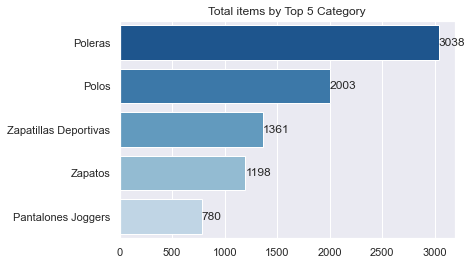

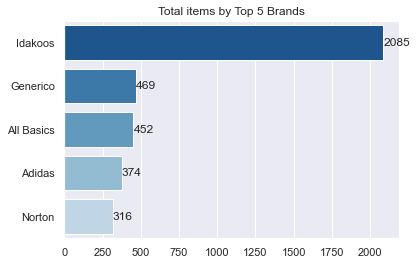

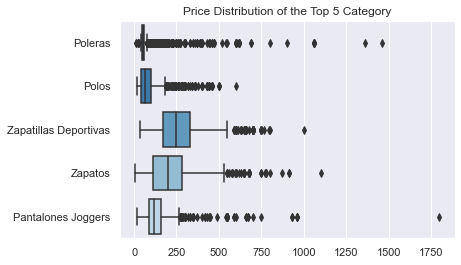

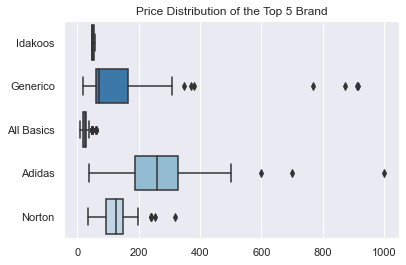

In [132]:
sns.set()
sns.set_palette('Blues_r')

# Define top values for sns plots with df
# Define top level value
top = 5

# Define top index
category_top_index = pd.DataFrame(df_all['category'].value_counts().sort_values(ascending=False)).index[:top]
brand_top_index = pd.DataFrame(df_all['brand'].value_counts().sort_values(ascending=False)).index[:top]

# Defince top index values
category_top_values = df_all['category'].value_counts().sort_values(ascending=False).values[:top]
brand_top_values = df_all['brand'].value_counts().sort_values(ascending=False).values[:top]

# Categorical Plots
# Top Category
top_category_plot = sns.countplot(y='category', data=df_all, order=category_top_index)
top_category_plot.set(title=f'Total items by Top {top} Category', xlabel=None, ylabel=None)
top_category_plot.bar_label(container=top_category_plot.containers[0], labels=category_top_values)
plt.show()

# Top Brands
top_brand_plot = sns.countplot(y='brand', data=df_all, order=brand_top_index)
top_brand_plot.set(title=f'Total items by Top {top} Brands', xlabel=None, ylabel=None)
top_brand_plot.bar_label(container=top_brand_plot.containers[0], labels=brand_top_values)
plt.show()


###
###

# Boxplots: Shows the distribution of quantitative data, See median, spread, skewness, and outliers, Facilitates comparisons between groups

# Price boxplot: Category
sns.boxplot(x='price', y='category', data=df_all, order=category_top_index).set(title=f'Price Distribution of the Top {top} Category', xlabel=None, ylabel=None)
plt.show()

# Price boxplot: Brand
sns.boxplot(x='price', y='brand', data=df_all, order=brand_top_index).set(title=f'Price Distribution of the Top {top} Brand', xlabel=None, ylabel=None)
plt.show()